In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Project 2 - Fun with Filters and Frequencies

## Part 1 - Fun with Filters

### Part 1.1 - Finite Difference Operators

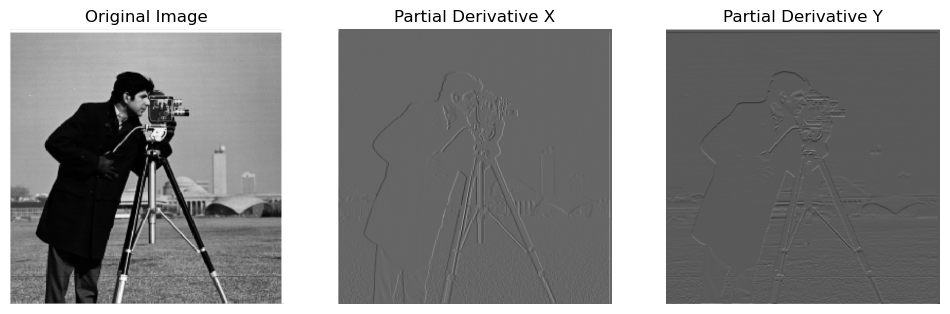

In [2]:
# Define finite difference operators
D_x = np.reshape([1, -1], (1, 2))
D_y = np.reshape([1, -1], (2, 1))

# Load the image
cameraman = plt.imread('../data/cameraman.png')
cameraman = np.mean(cameraman, axis=2)

# Compute partial derivatives
partial_derivative_x = convolve2d(cameraman, D_x, mode='same')
partial_derivative_y = convolve2d(cameraman, D_y, mode='same')

# Plot the original image and its partial derivatives
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(partial_derivative_x, cmap='gray')
plt.title('Partial Derivative X')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(partial_derivative_y, cmap='gray')
plt.title('Partial Derivative Y')
plt.axis('off')

plt.show()

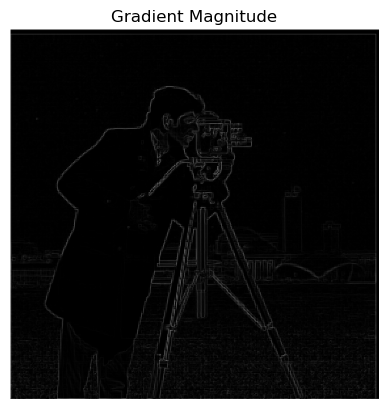

In [3]:
# Gradient magnitude
gradient_magnitude = np.sqrt(partial_derivative_x**2 + partial_derivative_y**2)

plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
plt.show()

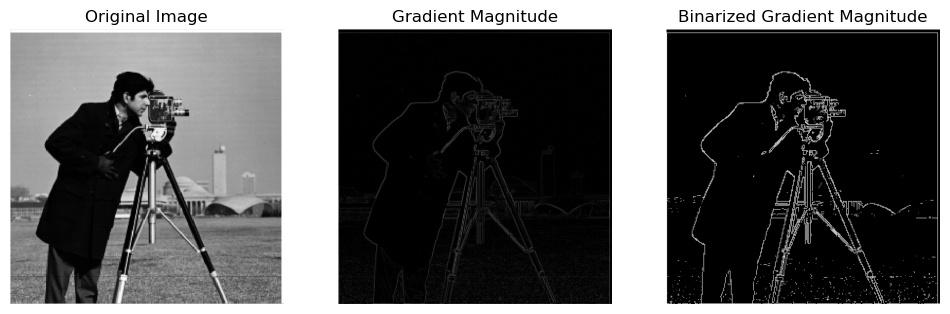

In [4]:
# Binarize the gradient magnitude image
threshold = 0.15  # You may need to adjust this value
binary_image = gradient_magnitude > threshold

# Plot the original image, gradient magnitude, and binary image
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarized Gradient Magnitude')
plt.axis('off')

plt.show()

### Part 1.2 - Derivative of Gaussian (DoG) Filter

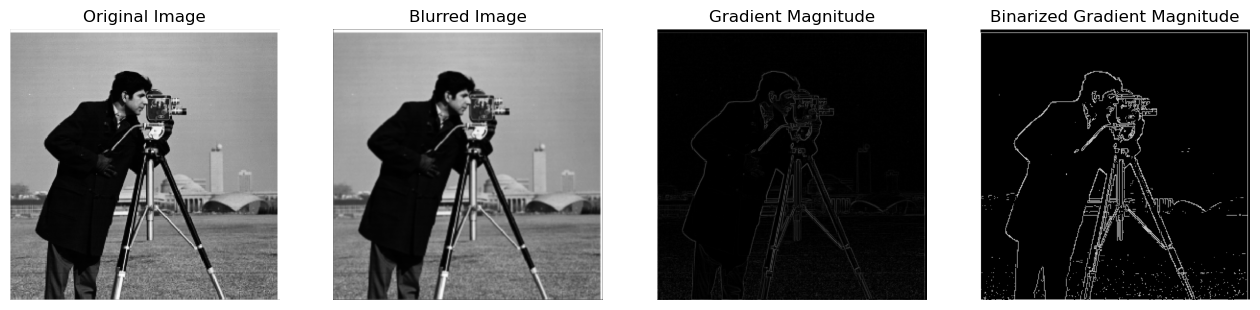

In [19]:
# Create a 2D Guassian filter
gaussian_1d = cv2.getGaussianKernel(5, 1)
gaussian_2d = np.outer(gaussian_1d, gaussian_1d)

# Convolve the original image with the Gaussian filter to get a blurred image
blurred_image = convolve2d(cameraman, gaussian_2d, mode='same')

partial_derivative_x_blurred = convolve2d(blurred_image, D_x, mode='same')
partial_derivative_y_blurred = convolve2d(blurred_image, D_y, mode='same')

gradient_magnitude_blurred = np.sqrt(partial_derivative_x_blurred**2 + partial_derivative_y_blurred**2)

threshold = 0.08 # You may need to adjust this value
binary_image_blurred = gradient_magnitude_blurred > threshold

# Plot the original image, blurred image, gradient magnitude, and binary image
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarized Gradient Magnitude')
plt.axis('off')

plt.show()

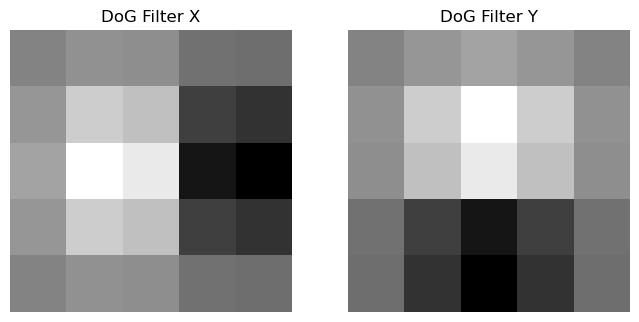

In [21]:
# Create DoG filters by convolving the Gaussian filter with D_x and D_y
DoG_x = convolve2d(gaussian_2d, D_x, mode='same')
DoG_y = convolve2d(gaussian_2d, D_y, mode='same')

# Display the resulting DoG filters
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(DoG_x, cmap='gray')
plt.title('DoG Filter X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(DoG_y, cmap='gray')
plt.title('DoG Filter Y')
plt.axis('off')

plt.show()